# One Application of DBSCAN to Clustering Transaction Data
To study the data provided, we will start with an exploratory analysis. So, I begin by loading data.

In [1]:
# Libraries

import pandas as pd
import numpy as np

In [2]:
# Load data

df = pd.read_table('Data/purch.txt')
df.head(6)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,03/01/18,VR,82.20,GBP,82.20,GBP,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
1,05/02/18,VR,60.00,GBP,60.00,GBP,malthurst limited,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
2,29/01/18,VR,50.00,GBP,50.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
3,19/01/18,VR,45.00,GBP,45.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
4,18/01/18,VR,77.49,GBP,77.49,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health
5,08/01/18,VR,63.87,GBP,63.87,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health


In [3]:
# Get information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TRANS DATE          5640 non-null   object
 1   TRANS VAT DESC      5011 non-null   object
 2   ORIGINAL GROSS AMT  5640 non-null   object
 3   ORIGINAL CUR        5640 non-null   object
 4   BILLING GROSS AMT   5640 non-null   object
 5   BILLING CUR CODE    5640 non-null   object
 6   MERCHANT NAME       5640 non-null   object
 7   CARD NUMBER         5640 non-null   object
 8   TRANS CAC CODE 1    5636 non-null   object
 9   TRANS CAC DESC 1    5636 non-null   object
 10  TRANS CAC CODE 2    5632 non-null   object
 11  TRANS CAC DESC 2    5632 non-null   object
 12  TRANS CAC CODE 3    5631 non-null   object
 13  Directorate         5640 non-null   object
dtypes: object(14)
memory usage: 617.0+ KB


In [4]:
# Columns' name

df.columns

Index(['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'BILLING GROSS AMT', 'BILLING CUR CODE', 'MERCHANT NAME', 'CARD NUMBER',
       'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2',
       'TRANS CAC DESC 2', 'TRANS CAC CODE 3', 'Directorate'],
      dtype='object')

In [5]:
# Identify count by variables and it possible values

Dictionary = {}
for variable in df.columns:
    Dictionary[variable] = len(df[variable].unique())
    
Dictionary

{'TRANS DATE': 39,
 'TRANS VAT DESC': 6,
 'ORIGINAL GROSS AMT': 3720,
 'ORIGINAL CUR': 5,
 'BILLING GROSS AMT': 3722,
 'BILLING CUR CODE': 1,
 'MERCHANT NAME': 1244,
 'CARD NUMBER': 607,
 'TRANS CAC CODE 1': 80,
 'TRANS CAC DESC 1': 80,
 'TRANS CAC CODE 2': 476,
 'TRANS CAC DESC 2': 473,
 'TRANS CAC CODE 3': 4,
 'Directorate': 9}

In [6]:
# Transform type of data

# First, I replace . by ,
df['BILLING GROSS AMT'] = df['BILLING GROSS AMT'].str.replace(',', '')
df['ORIGINAL GROSS AMT'] = df['ORIGINAL GROSS AMT'].str.replace(',', '')

# Then, change type of data
df['BILLING GROSS AMT'] = df['BILLING GROSS AMT'].astype(float)
df['ORIGINAL GROSS AMT'] = df['ORIGINAL GROSS AMT'].astype(float)

# Exploratory analysis

It is convenient to examine what are the useful grouping categories. <br>
The following variables have fewer than 10 possible values, so it's a good idea to explore them: <br>
-TRANS VAT DESC, <br>
-ORIGINAL CUR, <br>
-TRANS CAC CODE 3, and <br>
-Directorate.

<center><b>Table 1. ORIGINAL AND BILLING GROSS AMT mean by TRANS VAT DESC</b></center>

In [7]:
# Data mining

t1 = df.groupby(by=['TRANS VAT DESC'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

t2 = df.groupby(by=['TRANS VAT DESC'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

pd.merge(t2, t1, on=['TRANS VAT DESC'])

,TRANS VAT DESC,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,VE,88.564000,101.000638,88.564000,101.000638
1,VL,57.773143,73.201567,57.773143,73.201567
2,VR,224.354253,865.025850,224.354253,865.025850
3,VS,75.641538,29.852021,75.641538,29.852021
4,VZ,96.928512,1184.881298,61.791554,168.098000


Hay dos cosas que notar de la tabla de encima: <br>
    1. Las desviaciones estandar son altas, esto quiere decir que los datos son muy dispersos como para valorar bien los promedios. <br>
    2. Los valores de las variables ORIGINAL GROSS AMT y BULLING GROSS AMT son distintos, a pesar de que parezca que no. Esto nota en los valores de las medias y desviaciones típicos hallados en las 3 tablas siguientes.

<center><b>Table 2. ORIGINAL AND BILLING GROSS AMT mean by CUR</b></center>

In [8]:
m1 = df.groupby(by=['ORIGINAL CUR'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['ORIGINAL CUR'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))


pd.merge(m2, m1, on=['ORIGINAL CUR'])

,ORIGINAL CUR,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,AUD,376.760000,NaN,222.590000,NaN
1,EUR,105.586667,122.519842,95.815556,111.073535
2,GBP,268.603985,783.980266,268.603985,783.980266
3,HUF,28197.666667,21841.207140,82.790000,63.985509
4,USD,180.697778,278.846732,135.191111,210.612078


<center><b>Table 3. ORIGINAL AND BILLING GROSS AMT mean by TRANS CAC CODE 3</b></center>

In [9]:
m1 = df.groupby(by=['TRANS CAC CODE 3'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['TRANS CAC CODE 3'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

pd.merge(m2, m1, on=['TRANS CAC CODE 3'])

,TRANS CAC CODE 3,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,A00,284.016741,1096.407748,268.871285,784.374581
1,A46,86.347692,90.344530,86.347692,90.344530
2,A5F,122.633333,113.258373,122.633333,113.258373


Hay que notar en la tabla de arriba que datos son mucho más dispersos paracada código de la variable TRANS CAC CODE 3. <br>

<center><b>Table 4. ORIGINAL AND BILLING GROSS AMT mean by Directorate</b></center>

In [10]:
m1 = df.groupby(by=['Directorate'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['Directorate'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

important = pd.merge(m2, m1, on=['Directorate'])

important

,Directorate,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,Adult Social Care and Health,331.403265,2234.109260,331.403265,2234.109260
1,CYP&F,66.550377,124.335740,66.549245,124.336277
2,CYP&F,327.881429,385.370614,327.881429,385.370614
3,CYP&F,117.640000,146.574737,117.640000,146.574737
4,CYP&F SCHOOLS,65.342753,101.564603,65.222719,101.237755
5,Corporate Resources,368.763743,2973.158102,147.598901,435.041100
6,DEVELOPMENT,78.570930,87.941759,78.470000,87.975465
7,Development,38.574286,59.793120,38.574286,59.793120
8,Local Services,677.325232,1060.514535,677.218689,1060.514194


Como se observa, hay un problema en la categoría CYP&F, pues se asignan 3 grupos diferentes para estas; probablemente se deba a espacios adincionales en su registro. Así mismo para las categorías DEVELOPMENT y Development. Esto se corregirá antes de analizar los datos. <br>
Para verificar esto, vamos a servirnos de la siguiente línea de código escrita a continuación.

In [11]:
# All posibble values

important['Directorate'].unique()

array(['Adult Social Care and Health', 'CYP&F', 'CYP&F ', 'CYP&F  ',
       'CYP&F SCHOOLS', 'Corporate Resources', 'DEVELOPMENT',
       'Development', 'Local Services'], dtype=object)

Es importante corregir este error en toda la base, así que:

In [12]:
# Reemplazamos los caracteres, para corregir los datos.
df['Directorate'] = df['Directorate'].str.replace('CYP&F ', 'CYP&F')
df['Directorate'] = df['Directorate'].str.replace('CYP&F  ', 'CYP&F')
df['Directorate'] = df['Directorate'].str.replace('DEVELOPMENT', 'Development')

Reprocesando:

In [13]:
m1 = df.groupby(by=['Directorate'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['Directorate'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

important = pd.merge(m2, m1, on=['Directorate'])

important

,Directorate,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,Adult Social Care and Health,331.403265,2234.109260,331.403265,2234.109260
1,CYP&F,72.678744,141.075013,72.677638,141.075524
2,CYP&F,117.640000,146.574737,117.640000,146.574737
3,CYP&FSCHOOLS,65.342753,101.564603,65.222719,101.237755
4,Corporate Resources,368.763743,2973.158102,147.598901,435.041100
5,Development,72.971400,85.224711,72.884600,85.248713
6,Local Services,677.325232,1060.514535,677.218689,1060.514194


In [14]:
# All posibble values

important['Directorate'].unique()

array(['Adult Social Care and Health', 'CYP&F', 'CYP&F ', 'CYP&FSCHOOLS',
       'Corporate Resources', 'Development', 'Local Services'],
      dtype=object)

# Clustering

Primero hay que tomar un corte para hacer el análisis, para eso vamos a tomar temporalmente la fecha más reciente. (Sería mejor escribir un algoritmo para seleccionar al menos una transacción de una tarjeta en el rango de una fecha*, pero vamos a dejar esto de momento). <br>
Además, hay que eliminar de la base la variable CARD NUMBER porque no es una variable que contenga información de las características de las observaciones; más bien codifica las observaciones, pero como contiene asteríscos para salvaguardar la privacidad de los operadores de las transacciones y esto limita su identificación puntual.
Por último, no olvidemos quitar la columna TRANS DATE que solo indica la fecha de corte al que se recuperó la información.

*Esto es así porque tiendo a creer, sin tener mucho detalle de la información, que un cliente (si fuere el caso) puede realizar una transacción con una frecuencia menor al día que a la semana.

In [15]:
df['TRANS DATE'].sort_values(ascending=False)

5425    31/01/18
2325    31/01/18
4160    31/01/18
4159    31/01/18
2362    31/01/18
          ...   
4964    01/02/18
4963    01/02/18
4962    01/02/18
4961    01/02/18
4966    01/02/18
Name: TRANS DATE, Length: 5640, dtype: object

In [16]:
df_kurt = df[df['TRANS DATE'] == '31/01/18']
df_kurt = df_kurt.drop(columns=['TRANS DATE', 'CARD NUMBER'])
# Alson we can delet CAR NUMBER column with line df_kurt = df_kurt.loc[:, ~df_kurt.columns.isin(['CARD NUMBER'])]
df_kurt.head(4)

,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
6,VR,51.43,GBP,51.43,GBP,shell kings 587,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health
16,VR,75.00,GBP,75.00,GBP,hmcourts-service.g,MC70,Supplies & Sev Mic,RV3T0,Mental Health Management Budget,A00,Adult Social Care and Health
51,VR,55.54,GBP,55.54,GBP,weoley castle,K020,Vehicle Fuel,RV18X,Harborne Day Centre,A00,Adult Social Care and Health
64,VR,39.09,GBP,39.09,GBP,texaco ash motor,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,Adult Social Care and Health


# Cálculo de distencias
Vamos a usar el método de Gower para calcular las distancias entre variables cualitativas y cuantitativas que luego vamos a agrupar con DBSCAN. <br>
Para una lectura introductoria revisar: https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad

In [17]:
import gower

# Creamos una matriz cruzada con las distancias
distance_matrix = gower.gower_matrix(df_kurt)
pd.DataFrame(distance_matrix) 

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.000000,0.417445,0.250136,0.250407,0.083734,0.000367,0.250768,0.671467,0.597056,0.333586,...,0.501347,0.584539,0.549457,0.619383,0.564192,0.500283,0.501425,0.512374,0.501103,0.584800
1,0.417445,0.000000,0.417309,0.417852,0.417846,0.417077,0.416676,0.670689,0.596278,0.500525,...,0.502125,0.585317,0.550234,0.620161,0.564970,0.500495,0.502203,0.511597,0.501881,0.585578
2,0.250136,0.417309,0.000000,0.250543,0.250537,0.250232,0.000633,0.671332,0.596920,0.333451,...,0.501482,0.584675,0.549592,0.619519,0.564328,0.500147,0.501561,0.512239,0.501239,0.584936
3,0.250407,0.417852,0.250543,0.000000,0.250006,0.250775,0.251176,0.671874,0.597463,0.333994,...,0.500939,0.584132,0.549049,0.618976,0.563785,0.500690,0.501018,0.512782,0.500696,0.584393
4,0.083734,0.417846,0.250537,0.250006,0.000000,0.084102,0.251169,0.671868,0.597457,0.333988,...,0.500946,0.584138,0.549056,0.618982,0.563791,0.500684,0.501024,0.512775,0.500702,0.584399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.500283,0.500495,0.500147,0.500690,0.500684,0.500085,0.500486,0.671184,0.596773,0.500030,...,0.418296,0.501489,0.133073,0.202999,0.147808,0.000000,0.418375,0.428758,0.418053,0.501750
249,0.501425,0.502203,0.501561,0.501018,0.501024,0.501793,0.502194,0.672892,0.598481,0.501678,...,0.083412,0.500219,0.464698,0.534625,0.479433,0.418375,0.000000,0.097133,0.083655,0.333375
250,0.512374,0.511597,0.512239,0.512782,0.512775,0.512007,0.511606,0.659093,0.584681,0.512121,...,0.097054,0.513581,0.478498,0.548424,0.493233,0.428758,0.097133,0.000000,0.096811,0.347175
251,0.501103,0.501881,0.501239,0.500696,0.500702,0.501471,0.501872,0.672571,0.598159,0.501357,...,0.083577,0.500103,0.465020,0.534946,0.479755,0.418053,0.083655,0.096811,0.000000,0.333697


In [18]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.1, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df_kurt["cluster"] = dbscan_cluster.labels_

In [19]:
df_kurt.head()

,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,cluster
6,VR,51.43,GBP,51.43,GBP,shell kings 587,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health,0
16,VR,75.00,GBP,75.00,GBP,hmcourts-service.g,MC70,Supplies & Sev Mic,RV3T0,Mental Health Management Budget,A00,Adult Social Care and Health,-1
51,VR,55.54,GBP,55.54,GBP,weoley castle,K020,Vehicle Fuel,RV18X,Harborne Day Centre,A00,Adult Social Care and Health,1
64,VR,39.09,GBP,39.09,GBP,texaco ash motor,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,Adult Social Care and Health,-1
89,VR,39.28,GBP,39.28,GBP,acocks green 224,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health,0


In [20]:
# Handling the missing values

df_kurt.fillna(method ='ffill', inplace = True)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_kurt_scaled = scaler.fit_transform(distance_matrix)
  
# Normalizing the data so that 
# the data approdf_kurtimately follows a Gaussian distribution
df_kurt_normalized = normalize(df_kurt_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_kurt_normalized = pd.DataFrame(df_kurt_normalized)

### Reducing the dimensionality of the data to make it visualizable

In [22]:
pca = PCA(n_components = 2)
df_kurt_principal = pca.fit_transform(df_kurt_normalized)
df_kurt_principal = pd.DataFrame(df_kurt_principal)
df_kurt_principal.columns = ['P1', 'P2']
print(df_kurt_principal.head())

         P1        P2
0  0.589158  0.287696
1  0.508937  0.190849
2  0.597620  0.287827
3  0.616738  0.290738
4  0.596527  0.289358


In [23]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 20).fit(df_kurt_principal)
labels = db_default.labels_

In [24]:
labels.sort()
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2

In [25]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 20).fit(df_kurt_principal)
labels = db_default.labels_

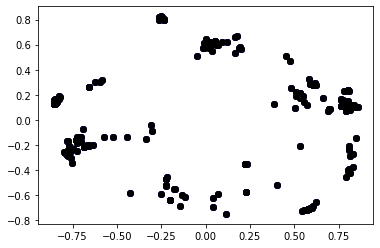

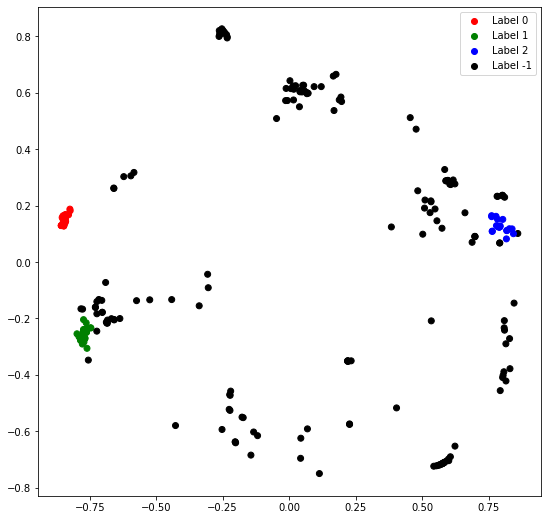

In [27]:
import matplotlib.pyplot as plt

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(df_kurt_principal['P1'], df_kurt_principal['P2'], color ='r');
g = plt.scatter(df_kurt_principal['P1'], df_kurt_principal['P2'], color ='g');
b = plt.scatter(df_kurt_principal['P1'], df_kurt_principal['P2'], color ='b');
k = plt.scatter(df_kurt_principal['P1'], df_kurt_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(df_kurt_principal['P1'], df_kurt_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()